In [1]:
#!pip install scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
df= pd.read_csv('Loan.csv')

# Pre-processing 

In [7]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [9]:
df.shape

(20000, 36)

In [11]:
df.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [13]:
## checking bins
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")

ApplicationDate:
 ApplicationDate
2018-01-01    1
2054-07-01    1
2054-07-08    1
2054-07-07    1
2054-07-06    1
             ..
2036-04-02    1
2036-04-01    1
2036-03-31    1
2036-03-30    1
2072-10-03    1
Name: count, Length: 20000, dtype: int64

Age:
 Age
18    803
40    715
39    682
42    676
37    669
     ... 
80      8
74      8
76      4
78      3
79      3
Name: count, Length: 63, dtype: int64

AnnualIncome:
 AnnualIncome
15000     584
300000     26
68064       4
24627       4
36604       4
         ... 
48316       1
50463       1
25001       1
22593       1
53227       1
Name: count, Length: 17516, dtype: int64

CreditScore:
 CreditScore
609    204
593    182
585    181
604    180
602    180
      ... 
385      1
387      1
693      1
381      1
383      1
Name: count, Length: 322, dtype: int64

EmploymentStatus:
 EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

EducationLevel:
 EducationLevel
Bachelor      

In [17]:
# dropping columns 
df.drop(columns = ['ApplicationDate'], inplace = True)
df.drop (columns = ['RiskScore'], inplace = True)
df.shape

KeyError: "['ApplicationDate'] not found in axis"

In [19]:
# checking nulls 
df.isna().sum

<bound method DataFrame.sum of          Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0      False         False        False             False           False   
1      False         False        False             False           False   
2      False         False        False             False           False   
3      False         False        False             False           False   
4      False         False        False             False           False   
...      ...           ...          ...               ...             ...   
19995  False         False        False             False           False   
19996  False         False        False             False           False   
19997  False         False        False             False           False   
19998  False         False        False             False           False   
19999  False         False        False             False           False   

       Experience  LoanAmount  LoanDuration 

In [21]:
##using get dummies to change to boolean true or false to allow the model to work better)
df = pd.get_dummies(df, columns = ['LoanPurpose','HomeOwnershipStatus','MaritalStatus','EducationLevel','EmploymentStatus'], drop_first = True, dtype = int)

In [23]:
df.head

<bound method NDFrame.head of        Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0       45         39948          617          22       13152            48   
1       38         39709          628          15       26045            48   
2       47         40724          570          26       17627            36   
3       58         69084          545          34       37898            96   
4       37        103264          594          17        9184            36   
...    ...           ...          ...         ...         ...           ...   
19995   44         30180          587          19       24521            36   
19996   56         49246          567          33       25818            36   
19997   44         48958          645          20       37033            72   
19998   60         41025          560          36       14760            72   
19999   20         53227          574           0       32055            48   

       NumberOfDepend

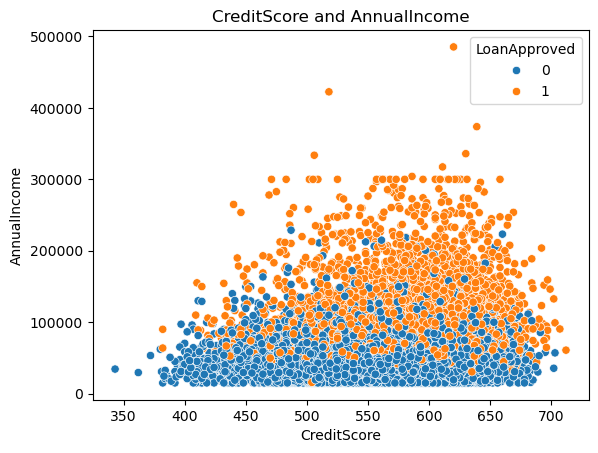

<Figure size 640x480 with 0 Axes>

In [162]:
plt.title('CreditScore and AnnualIncome')

sns.scatterplot(df, x = 'CreditScore' , y = 'AnnualIncome', hue = 'LoanApproved')
plt.show()
plt.savefig('3162-Project2-Graph2')

<Figure size 6000x6000 with 0 Axes>

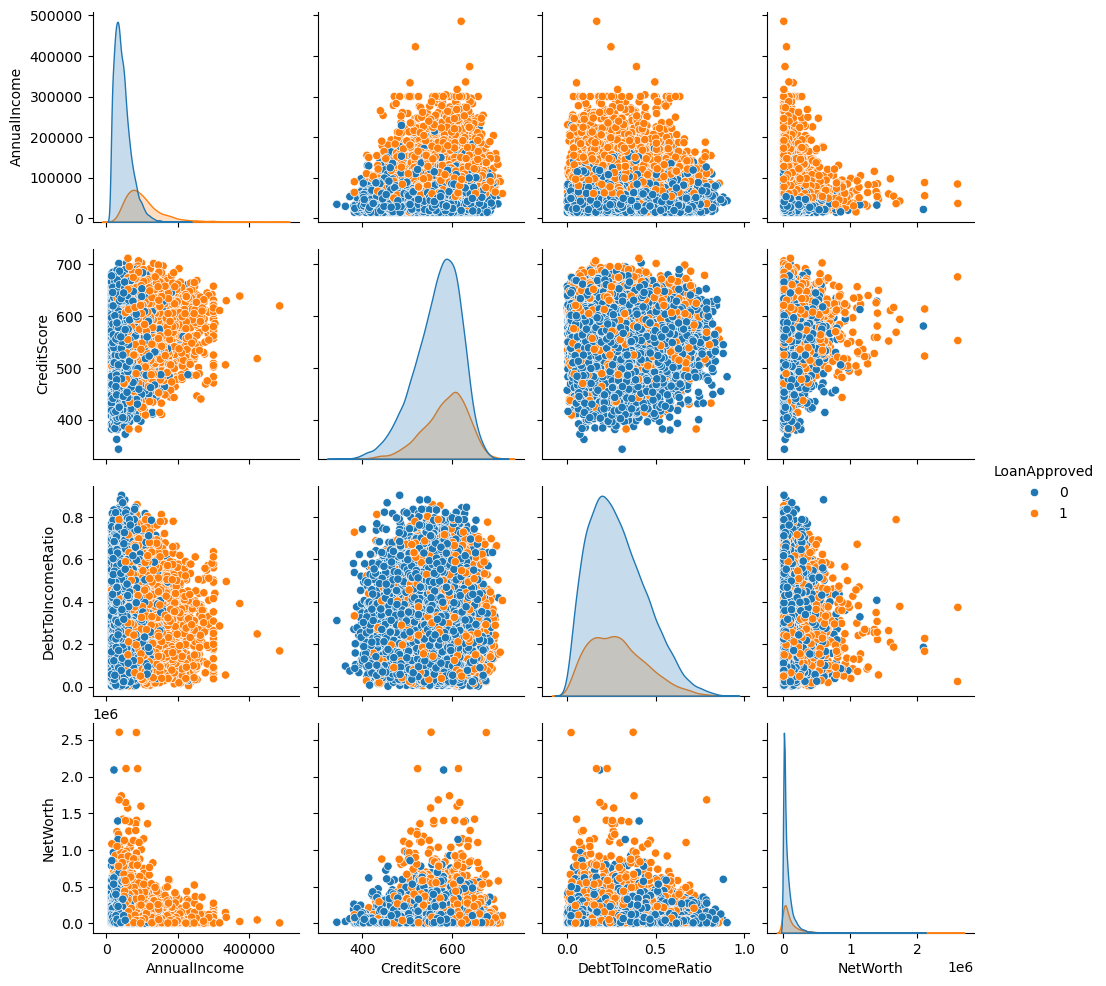

In [160]:
plt.figure(figsize= (60,60))
sns.pairplot(df, hue = 'LoanApproved', vars = df[['AnnualIncome', 'CreditScore', 'DebtToIncomeRatio', 'NetWorth']])
plt.show()

## Training and spliting the data 

In [31]:
X = df.drop(columns = ['LoanApproved'])
Y = df['LoanApproved']

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [35]:
##Spilting the data 
 ##80% training 20 test so that overfitting does not occur
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

In [37]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("Y_train", Y_train.shape)
print("Y_test", Y_test.shape)

X_train (16000, 44)
X_test (4000, 44)
Y_train (16000,)
Y_test (4000,)


# Random Forest 

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state = 42)

In [41]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [43]:
##predicted
Y_pred = rf.predict(X_test)

In [45]:
##accuracy
rf.score(X_test,Y_test)

0.92375

### Confusion Matrix

<Figure size 1000x1000 with 0 Axes>

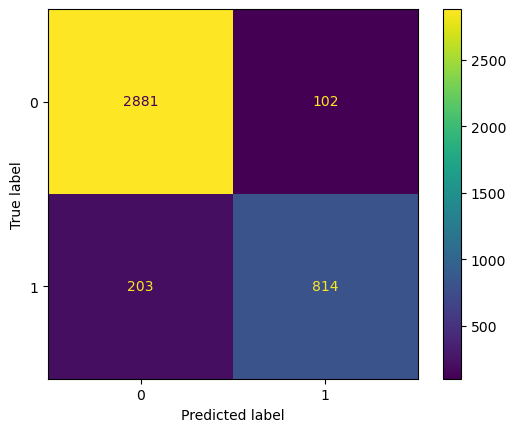

<Figure size 640x480 with 0 Axes>

In [164]:
plt.figure(figsize= (10,10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('3162-Project2-ConfusionMatrix')


### Classification Report

In [49]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2983
           1       0.89      0.80      0.84      1017

    accuracy                           0.92      4000
   macro avg       0.91      0.88      0.90      4000
weighted avg       0.92      0.92      0.92      4000



### Important Features

In [51]:
feature_importance = rf.feature_importances_
features = X.columns

In [53]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

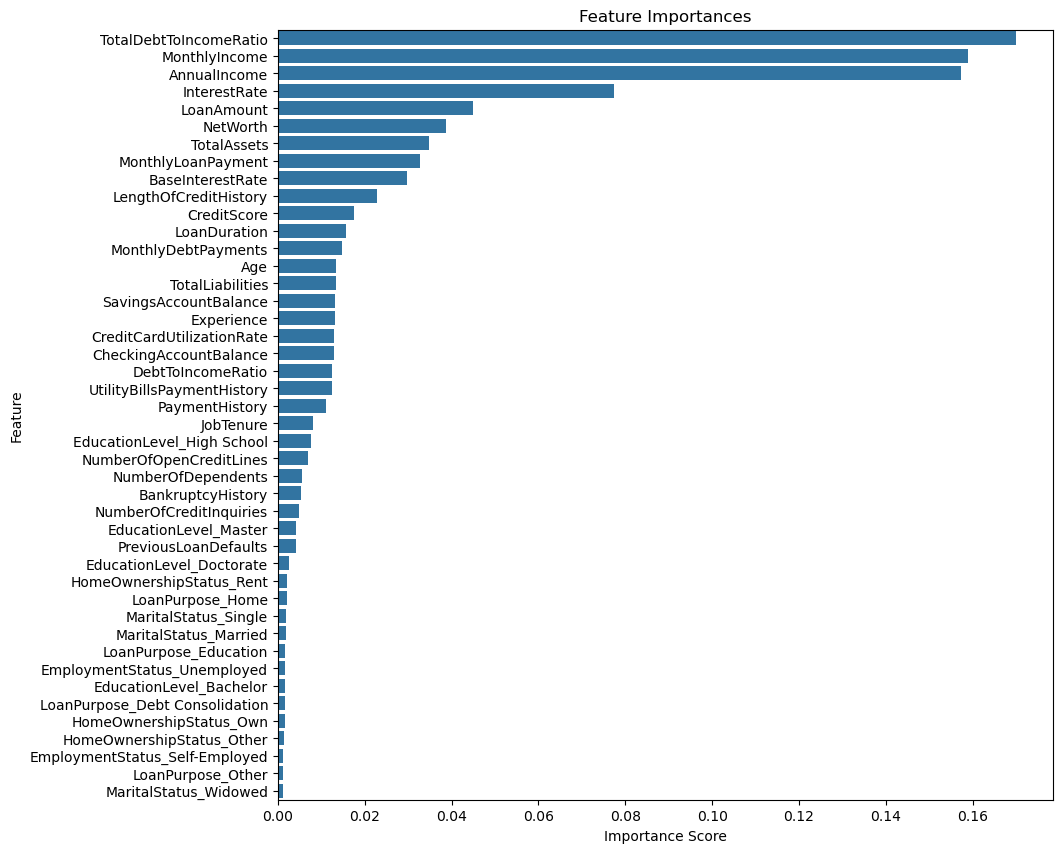

In [166]:
plt.figure(figsize= (10,10))
sns.barplot(x='Importance', y='Feature', data=importance_df,)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.savefig('3162-Project2-FeatureImportances2')
plt.show()